In [8]:
import requests
import csv
import pandas as pd
import feedparser
import re

In [31]:
file = open("newfeed3.csv","w",encoding="utf-8")
writer = csv.writer(file)
writer.writerow(["Title","Description","Link","Year","Month"])
feed = open("FinalUrl.txt","r")
urls = feed.read()
urls = urls.split("\n")
df = pd.DataFrame(columns=["Title","Description","Link","Year","Month"])
item_dicts = {}
for url in urls:

    try:    
            f = feedparser.parse(url)
    except Exception as e:
            print('Could not parse the xml: ', url)
            print(e)
    for item in f.entries:
        r = re.compile(r"<[^>]*>")
        try:
            items_dicts = {'Title':item.title,'Description':r.sub(r"",item.summary),'Link':item.link,'Year':item.published_parsed[0],'Month':item.published_parsed[1]}
        except:
            pass
      
        f = csv.DictWriter(file, items_dicts.keys())
        f.writerow(items_dicts)

In [32]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
import yake

In [33]:
df = pd.read_csv("newfeed3.csv")

In [34]:
df.dropna(inplace=True)

In [35]:
df.isna().sum()

Title          0
Description    0
Link           0
Year           0
Month          0
dtype: int64

In [36]:
df

,Title,Description,Link,Year,Month
0,YARN – Yet Another Resource Negotiator,"In today&#8217;s world, data is being generate...",https://www.analyticsvidhya.com/blog/2022/01/y...,2022,1
1,"Data Warehouses, Data Marts and Data Lakes",Introduction All data mining repositories have...,https://www.analyticsvidhya.com/blog/2022/01/d...,2022,1
2,TOP 10 GitHub Repositories for Data Science,Introduction Data science is a collaborative s...,https://www.analyticsvidhya.com/blog/2022/01/t...,2022,1
3,HIVE: INTERNAL AND EXTERNAL TABLES,INTRODUCTION Hive is one of the most popular d...,https://www.analyticsvidhya.com/blog/2022/01/h...,2022,1
4,Global AI Leader Fractal Becomes Unicorn with ...,"Fractal, a global provider of artificial intel...",https://www.analyticsvidhya.com/blog/2022/01/g...,2022,1
...,...,...,...,...,...
1105,Faculty Interview: Dustin Duncan,Dustin Duncan is an Affiliated Faculty member ...,https://cds.nyu.edu/news/%relationship%/facult...,2016,4
1106,Data Science Grant Opportunity,As part of the Moore-Sloan Data Science Enviro...,https://cds.nyu.edu/uncategorized/%relationshi...,2016,4
1107,CDS Hosts its First Datathon,"At the Center for Data Science, our commitment...",https://cds.nyu.edu/news/%relationship%/cds-ho...,2016,4
1108,Spring 2016 Career Recap,One of the most compelling reasons to enter in...,https://cds.nyu.edu/news/%relationship%/spring...,2016,4


In [37]:
desc_1 = []
for text in df["Description"]:
    desc_1.append(re.sub("\s+"," ",text).lower())

In [38]:
desc_2 = []
for text in desc_1:
    desc_2.append(re.sub("\[.+\]","",text))

In [39]:
desc_3 = []
for text in desc_2:
    desc_3.append(re.sub("&.+;","",text))

In [40]:
desc_4 = []
for text in desc_3:
    desc_4.append(re.sub(r'http\S+', '',text))

In [41]:
clean_desc = []
for text in desc_4:
    clean_desc.append(re.sub(r'[^\w\s]',"",text))

In [42]:
stop_words=set(stopwords.words("english"))
wnet = WordNetLemmatizer()
port = PorterStemmer()

In [43]:
stop_words_2 = []
condition = ['not','nor','no']
for words in stop_words:
    if words not in condition:
        stop_words_2.append(words)

In [44]:
def lemmatize_text(text):
    words = word_tokenize(text)
    words_2 = []
    lemm_2 = ""
    for word in words:
        if word not in stop_words_2:
            words_2.append(word)
    for word in words_2:
        lemm = wnet.lemmatize(word)
        lemm_2+=lemm+" "
    return lemm_2

In [56]:
#lemm_desc = []
lemm_desc = ""
for text in clean_desc:
    #lemm_desc.append(lemmatize_text(text))
    lemm_desc+=lemmatize_text(text)+" "


In [57]:
language = "en"
max_ngram_size = 2
deduplication_thresold = 0.9
deduplication_algo = 'seqm'
windowSize = 1
numOfKeywords = 100

custom_kw_extractor = yake.KeywordExtractor(lan=language, n=max_ngram_size, dedupLim=deduplication_thresold, dedupFunc=deduplication_algo, windowsSize=windowSize, top=numOfKeywords, features=None)
keywords = custom_kw_extractor.extract_keywords(lemm_desc)

for kw in keywords:
    print(kw)

('data science', 2.9713755192469733e-07)
('hugging face', 4.625689608042039e-07)
('amazon sagemaker', 4.694923997463719e-07)
('face transformer', 6.904301471841336e-07)
('transformer model', 7.956300432632581e-07)
('machine learning', 1.1174496048151354e-06)
('sagemaker appeared', 1.263711690829689e-06)
('part data', 1.5616335023303966e-06)
('data blogger', 1.684777286791755e-06)
('technology amazon', 2.5750457483443353e-06)
('sagemaker train', 2.870652417167545e-06)
('transformer introduction', 2.8842013683046305e-06)
('introduction hugging', 2.89850314697253e-06)
('face popular', 2.9275702921950886e-06)
('sagemaker offer', 3.042394194038166e-06)
('cloud hugging', 3.070706958849251e-06)
('science blogathon', 3.0906445028987167e-06)
('deploy hugging', 3.4137728703296698e-06)
('huggingface transformer', 3.4700599790720027e-06)
('offer post', 3.7492012391375e-06)
('data scientist', 3.799616412194829e-06)
('model prerequisite', 3.8761129958551525e-06)
('analytics vidhya', 4.11187219199840

In [58]:
kw = pd.DataFrame(keywords,columns=['keywords','tf idf'])

In [59]:
kw

,keywords,tf idf
0,data science,2.971376e-07
1,hugging face,4.625690e-07
2,amazon sagemaker,4.694924e-07
3,face transformer,6.904301e-07
4,transformer model,7.956300e-07
...,...,...
95,research statement,4.349414e-05
96,face,4.439256e-05
97,learning rate,4.521413e-05
98,science project,4.528666e-05


In [60]:
import matplotlib.pyplot as plt
%matplotlib inline

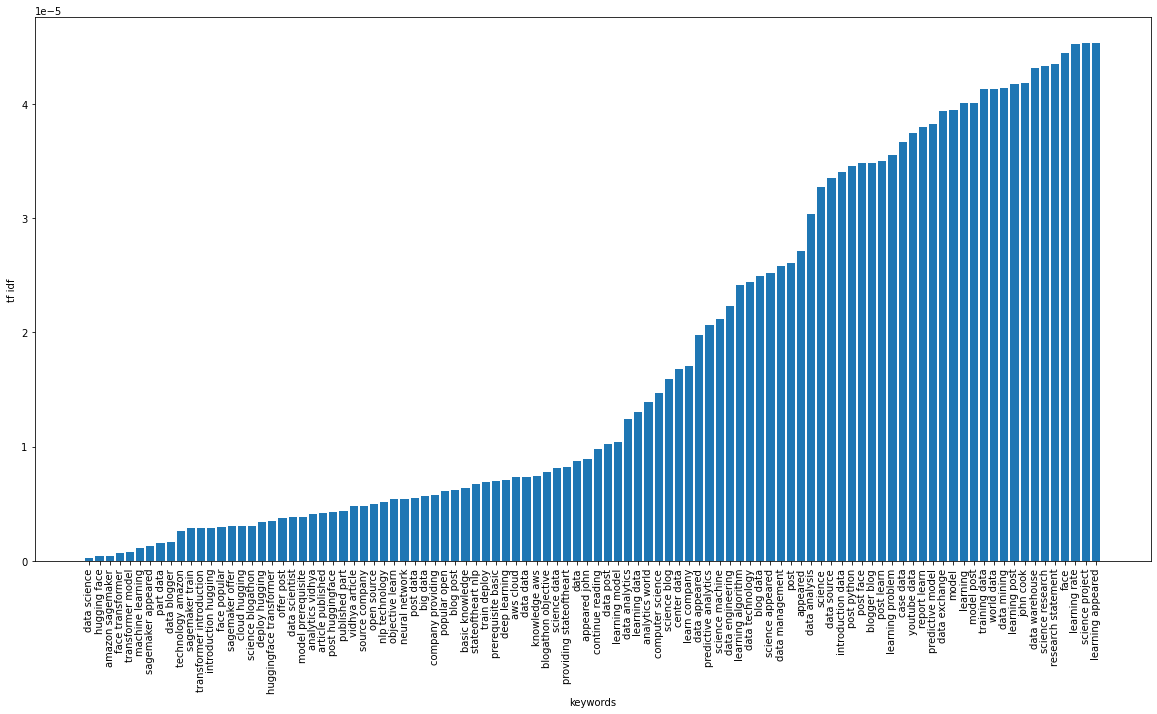

In [61]:
fig ,ax = plt.subplots(figsize=(20,10))
ax.bar(kw['keywords'],kw['tf idf'])
plt.xticks(rotation='vertical')
plt.xlabel('keywords')
plt.ylabel('tf idf');

In [62]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [63]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ankit\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [68]:
def sentiment_analyse(text):
    score = SentimentIntensityAnalyzer().polarity_scores(text)
    pos = 1000 * score['pos']
    return pos

In [69]:
lemm_desc2 = []
for text in clean_desc:
    lemm_desc2.append(lemmatize_text(text))

In [70]:
p_score = []
for text in lemm_desc2:
    score = sentiment_analyse(text)
    p_score.append(score)

In [71]:
df["Popularity Score"] = p_score

In [72]:
df

,Title,Description,Link,Year,Month,Popularity Score
0,YARN – Yet Another Resource Negotiator,"In today&#8217;s world, data is being generate...",https://www.analyticsvidhya.com/blog/2022/01/y...,2022,1,0.0
1,"Data Warehouses, Data Marts and Data Lakes",Introduction All data mining repositories have...,https://www.analyticsvidhya.com/blog/2022/01/d...,2022,1,0.0
2,TOP 10 GitHub Repositories for Data Science,Introduction Data science is a collaborative s...,https://www.analyticsvidhya.com/blog/2022/01/t...,2022,1,77.0
3,HIVE: INTERNAL AND EXTERNAL TABLES,INTRODUCTION Hive is one of the most popular d...,https://www.analyticsvidhya.com/blog/2022/01/h...,2022,1,67.0
4,Global AI Leader Fractal Becomes Unicorn with ...,"Fractal, a global provider of artificial intel...",https://www.analyticsvidhya.com/blog/2022/01/g...,2022,1,213.0
...,...,...,...,...,...,...
1105,Faculty Interview: Dustin Duncan,Dustin Duncan is an Affiliated Faculty member ...,https://cds.nyu.edu/news/%relationship%/facult...,2016,4,35.0
1106,Data Science Grant Opportunity,As part of the Moore-Sloan Data Science Enviro...,https://cds.nyu.edu/uncategorized/%relationshi...,2016,4,0.0
1107,CDS Hosts its First Datathon,"At the Center for Data Science, our commitment...",https://cds.nyu.edu/news/%relationship%/cds-ho...,2016,4,332.0
1108,Spring 2016 Career Recap,One of the most compelling reasons to enter in...,https://cds.nyu.edu/news/%relationship%/spring...,2016,4,203.0
